<a href="https://colab.research.google.com/github/ChauVietBao/trial/blob/main/Wooddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[122 113 110 ... 170 170 162]
 [117 115 109 ... 177 161 165]
 [ 80 102 107 ... 172 175 179]
 ...
 [106  79  76 ...  89  59  56]
 [ 83  84  76 ...  86  80  69]
 [ 68  74  74 ...  69  79  83]]


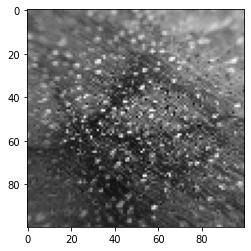

In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

datadir = "/content/drive/MyDrive/data"
categories=['Xoay','Xa_cu','Thuy_tung','Soi','Que','mun_soc','Mun','Mo','Lim','Lat_hoa','Jatoba','Cao_su','Bo_de','Bach_xanh','Bach_dang_nk']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

[[[105 120 132]
  [ 94 112 123]
  [ 97 107 119]
  ...
  [165 173 168]
  [166 172 167]
  [162 165 156]]

 [[ 99 115 127]
  [ 97 113 125]
  [ 91 107 120]
  ...
  [162 178 181]
  [158 163 161]
  [165 166 162]]

 [[ 73  81  79]
  [ 90 101 108]
  [ 95 105 115]
  ...
  [160 172 177]
  [167 175 177]
  [174 181 179]]

 ...

 [[ 83 108 109]
  [ 69  79  82]
  [ 71  77  76]
  ...
  [ 93  89  88]
  [ 67  59  56]
  [ 63  55  54]]

 [[ 74  84  84]
  [ 77  85  85]
  [ 71  77  75]
  ...
  [ 87  86  84]
  [ 77  80  80]
  [ 65  69  70]]

 [[ 63  70  67]
  [ 70  75  74]
  [ 71  74  74]
  ...
  [ 71  72  64]
  [ 79  80  76]
  [ 75  83  85]]]


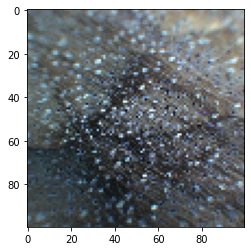

In [ ]:
datadir = "/content/drive/MyDrive/data"
categories=['Xoay','Xa_cu','Thuy_tung','Soi','Que','mun_soc','Mun','Mo','Lim','Lat_hoa','Jatoba','Cao_su','Bo_de','Bach_xanh','Bach_dang_nk']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_UNCHANGED)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
training_data = []
def create_training_data():
  
  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_COLOR)
        img_array = cv.cvtColor(img_array,cv.COLOR_BGR2RGB)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_training_data()

print (len(training_data))

  0%|          | 4/956 [00:06<25:05,  1.58s/it]


KeyboardInterrupt: ignored

In [ ]:
X = []
y = []
for features, label in training_data :
  X.append(features)
  y.append(label)
X = np.array (X).reshape(-1,img_size,img_size,3)
y= np.array(y)
print ('X',X.shape)
print ('y',y.shape)

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten

In [ ]:
X = np.array(X)
y = np.array(y)
y = to_categorical(y,15)

In [ ]:
# Initialize the CNN
model = Sequential()
# Convolution
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
# A second convolution layer
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# Pooling
model.add(MaxPooling2D((2,2)))
# Flattening
model.add(Flatten())
# Full connection
model.add(Flatten())
model.add(Dense(1024,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(256,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation = 'softmax'))


In [ ]:
#opt = SGD(learning_rate=0.01,momentum=0.9)
opt = Adam()
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X,y,epochs=15,batch_size=128,verbose=1)

Epoch 1/15
102/102 [==============================] - 20s 74ms/step - loss: 1499.2593 - accuracy: 0.2258
Epoch 2/15
102/102 [==============================] - 7s 73ms/step - loss: 1.5685 - accuracy: 0.4786
Epoch 3/15
102/102 [==============================] - 7s 73ms/step - loss: 1.1132 - accuracy: 0.6222
Epoch 4/15
102/102 [==============================] - 8s 74ms/step - loss: 0.8826 - accuracy: 0.7072
Epoch 5/15
102/102 [==============================] - 8s 75ms/step - loss: 0.7025 - accuracy: 0.7599
Epoch 6/15
102/102 [==============================] - 8s 75ms/step - loss: 0.5366 - accuracy: 0.8106
Epoch 7/15
102/102 [==============================] - 8s 75ms/step - loss: 0.5666 - accuracy: 0.8104
Epoch 8/15
102/102 [==============================] - 8s 75ms/step - loss: 0.3772 - accuracy: 0.8770
Epoch 9/15
102/102 [==============================] - 8s 75ms/step - loss: 0.3119 - accuracy: 0.8958
Epoch 10/15
102/102 [==============================] - 8s 76ms/step - loss: 0.5364 - ac

In [ ]:
model.save('wood.h5')
model_pre=load_model('wood.h5')

ModuleNotFoundError: ignored